In [2]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

2024-01-31 09:59:12.587534: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 09:59:12.624706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 09:59:12.624735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 09:59:12.625797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-31 09:59:12.631605: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-31 09:59:12.632618: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
model = keras.models.load_model('../model/location.keras')

In [4]:
def predict(sample_images):
    # Predict labels
    predicted = model.predict(sample_images)
    predicted_labels = np.argmax(predicted, axis=1)

    class_dict = {0:'T-shirt',1:'pants',2:'pullover',3:'shoes',4:'Bag'}
    # Display images and predictions
    fig, axes = plt.subplots(1, len(sample_images), figsize=(20, 2))
    for i, ax in enumerate(axes):
        ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'{class_dict.get(predicted_labels[i])}')
        ax.axis('off')
    plt.show()

In [5]:
def resize_image(image, new_size):
    img_pil = Image.fromarray(image)
    img_28x28 = np.array(img_pil.resize(new_size))
    return img_28x28

In [28]:
n = 5
sample_images = []
rows_up = [0, 63, 125, 20, 80, 72]
rows_down = [0, 44, 0, 90, 25, 30]
columns_up = [0, 150, 160, 235, 145, 105]
columns_down = [0, 118, 110, 35, 125, 167]

def increase_detail(img, img_name):
    laplacian_filtered = cv2.Laplacian(img, cv2.CV_64F)
    laplacian_filtered = cv2.convertScaleAbs(laplacian_filtered)
    enhanced_img = cv2.add(img, laplacian_filtered)
    img_new8_1 = enhanced_img.astype(np.uint8)
    cv2.imwrite(img_name, img_new8_1)
    return img_new8_1


for i in range(1, n + 1):
    im_gray = cv2.imread(f'../datasets/box{i}/output_image{i}-1.jpg', cv2.IMREAD_GRAYSCALE)
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale.jpg', im_gray)
    
    height, width = im_gray.shape
    im_gray_crop = im_gray[rows_up[i]:height - rows_down[i], columns_up[i]:width - columns_down[i]]
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale_crop.jpg', im_gray_crop)
    
    min_filtered = cv2.erode(im_gray_crop, None)
    img_new1 = min_filtered.astype(np.uint8)
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale_crop_min.jpg', img_new1)
    
    img_new8_1 = increase_detail(img_new1, f"../datasets/box{i}/output_image{i}-1_gray_scale_crop_min_lap.jpg")
    
    im_gray_crop_resize = resize_image(img_new8_1, (28, 28))
    cv2.imwrite(f'../datasets/box{i}/output_image{i}-1_gray_scale_crop_resize.jpg', im_gray_crop_resize)
    
    sample_images.append(im_gray_crop_resize)

1/1 [==============================] - 0s 22ms/step


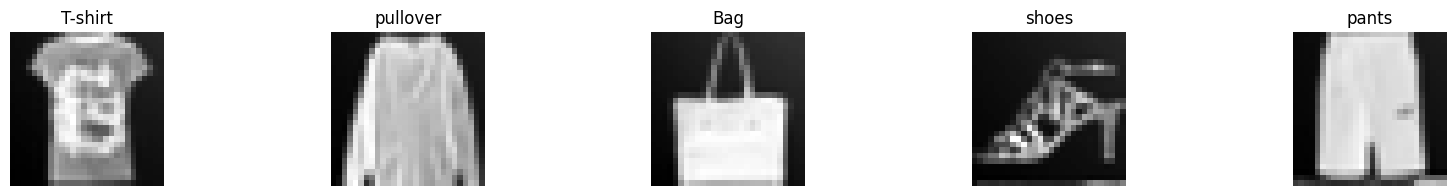

In [29]:
predict(np.array(sample_images))